In [ ]:
1) track daily crypto mentions by specific influencers
2) track historical and current crypto trends
3) see if there is a corralation between price spikes and twiitter mentions, and if so how many days it is offset

In [340]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

In [5]:
from config import consumer_key, consumer_secret


In [7]:
base_url="https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"
base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="https://api.polygon.io/v2/aggs/ticker/DASH/prev?adjusted=true&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="http://rest.coinapi.io/v1/exchangerate/ALICE?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="http://rest.coinapi.io/v1/assets?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url='https://api.polygon.io/v1/historic/forex/BTC/USD/2021-10-14?limit=100&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl'
    




In [8]:
c=requests.get(base_url).json()

NameError: name 'requests' is not defined

In [209]:
#df = pd.DataFrame(c)
  
# Print the output.
#df.loc[df.asset_id=='KMD']
c

{'status': 'NOT_AUTHORIZED',
 'request_id': '70d7a091d255c9cd8e899121a9e848ed',
 'message': 'You are not entitled to this data. Please upgrade your plan at https://polygon.io/pricing'}

In [95]:
df = pd.DataFrame(b['rates'])

In [108]:
df

,time,asset_id_quote,rate
0,2021-11-27T19:31:40.4000000Z,$PAC,2.928526e+03
1,2021-11-27T19:31:40.4000000Z,0X,1.618980e+01
2,2021-11-27T19:31:40.4000000Z,0XBTC,6.669732e+00
3,2021-11-27T19:31:40.4000000Z,100X,4.312145e+09
4,2021-11-27T19:31:40.4000000Z,10SET,1.954161e+01
...,...,...,...
4320,2021-11-27T19:31:40.4000000Z,ZTO,6.363764e-01
4321,2021-11-27T19:31:40.4000000Z,ZUSD,2.029943e+01
4322,2021-11-27T19:31:40.4000000Z,ZWAP,6.644804e-01
4323,2021-11-27T19:31:40.4000000Z,ZYN,8.922169e+01


In [112]:
df.loc[df.asset_id_quote=='KMD']

,time,asset_id_quote,rate
2063,2021-11-27T19:31:40.4000000Z,KMD,18.927185


In [10]:
from bs4 import BeautifulSoup
import tweepy

In [4]:
influencers=['Anthony Pompliano', 'Erik Voorhees',
'Ty Smith', 'Tone Vays',
'CryptoCobain',
'Tyler Winklevoss',
'Vitalik Buterin',
'CryptoWendyO',
'StackingUSD',
'Girl Gone Crypto',
'Euclid and Oaks',
'David Gokhshtein',
'Hailey Lennon',
'Justin Sun',
'Ivan on Tech',
'Kenn Bosak',
'CryptoBrekkie',
'Scott Melker',
'TheCryptoDog',
'BitBoy Crypto',
'Dan Held',
'PeterMcCormack',
'LayahHeilpern',
'Coinbound']

In [9]:
# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

NameError: name 'tweepy' is not defined

In [13]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [7]:
try:
    redirect_url = auth.get_authorization_url()
    print('success')
except tweepy.TweepError:
    print('Error! Failed to get request token.')

success


In [10]:
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

NameError: name 'tweepy' is not defined

In [58]:
tweets = api.user_timeline(screen_name="LadyofCrypto1", 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [59]:
tweets[195]

Status(_api=<tweepy.api.API object at 0x7fcb52a48358>, _json={'created_at': 'Fri Nov 26 17:13:38 +0000 2021', 'id': 1464281204769935373, 'id_str': '1464281204769935373', 'full_text': "@crypto_iso I tweeted this.\n\nNow I am getting asked for my next gem in every tweet lol. I do not think it's something you should envy.\n\nIt's why I have been off most of today. Trying to figure out if I should keep doing this.\n\nhttps://t.co/qSY6RLAy0A", 'truncated': False, 'display_text_range': [12, 250], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'crypto_iso', 'name': 'CryptoISO', 'id': 1112370699161751553, 'id_str': '1112370699161751553', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/qSY6RLAy0A', 'expanded_url': 'https://twitter.com/LadyofCrypto1/status/1463921641373802512?t=kfJJnRsGb8TFz4OPMtYEow&s=09', 'display_url': 'twitter.com/LadyofCrypto1/…', 'indices': [227, 250]}]}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for

In [62]:
for info in tweets[:5]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1465088235667968012
2021-11-28 22:40:30+00:00
@Christi65708411 @Adouble212 Exactly


ID: 1465087547164479494
2021-11-28 22:37:45+00:00
@VulcanForged Damn I was writing a thread on AAG too. This is great.


ID: 1465085365623181313
2021-11-28 22:29:05+00:00
@Adouble212 We aren't out of the woods yet but we could all use some perspective. In 2007 BTC didn't even exist, now it's 56k


ID: 1465083492673499138
2021-11-28 22:21:39+00:00
@willposkett @Ali_JaFF_ I wish I had the juice


ID: 1465082576385847299
2021-11-28 22:18:00+00:00
@TysonThe2nd Mutal 🤝




In [11]:
import urllib.request
url = "https://api.nomics.com/v1/currencies/ticker?key=" + crypto_key + "&ids=POLY&interval=1d,30d&convert=USD&per-page=100&page=1"
print(urllib.request.urlopen(url).read())


NameError: name 'crypto_key' is not defined

In [172]:
url= "https://api.nomics.com/v1/exchange-rates/history?key=d3c78c624d3a53b3c65efca117a241053f1c7bbd&currency=DASH&start=2021-11-14T00%3A00%3A00Z&end=2021-11-24T00%3A00%3A00Z"
print(urllib.request.urlopen(url).read())

b'[]\n'


In [167]:
my_data=requests.get(url).json()
df=pd.DataFrame(my_data)

In [161]:
df

,timestamp,rate
0,2021-11-14T00:00:00Z,65562.0407299127593862314221799174730383
1,2021-11-15T00:00:00Z,63656.600285154555399412432525623080449
2,2021-11-16T00:00:00Z,60150.24055002407492816745564181096076030
3,2021-11-17T00:00:00Z,60374.59659941780248532145496851419256709
4,2021-11-18T00:00:00Z,56912.89128822821581637055355587019524643
5,2021-11-19T00:00:00Z,58156.62403308490221963316822832306769105
6,2021-11-20T00:00:00Z,59753.08917317032767588807597565701451730
7,2021-11-21T00:00:00Z,58773.72044091704754515405653917305911319
8,2021-11-22T00:00:00Z,56297.34196170748458977626717040482673705
9,2021-11-23T00:00:00Z,57569.50491446103131133805389893805135486


In [162]:
df.rate.astype(str).astype(float)
df.dtypes

timestamp    object
rate         object
dtype: object

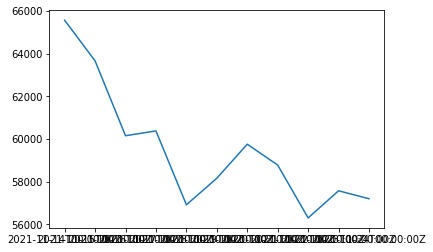

In [163]:
plt.plot(df.timestamp,df.rate.astype(str).astype(float))

In [327]:
url="https://min-api.cryptocompare.com/data/v2/histoday?fsym=ALICE&tsym=USD&limit=7&api_key=0aef86b70e6092ab15386d2bc845370e8836a810f1b65ece64a09b5e48d6c9f1"

In [328]:
my_data=requests.get(url).json()

In [329]:
df=pd.DataFrame(my_data)

In [330]:
len(df)

4

In [335]:
df=pd.DataFrame(my_data['Data']['Data'])

In [336]:
df.dtypes

time                  int64
high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
close               float64
conversionType       object
conversionSymbol     object
dtype: object

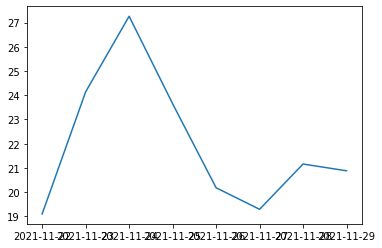

In [344]:
plt.plot(pd.to_datetime(df['time'], unit='s'),df.close)

In [345]:
df['time']=pd.to_datetime(df['time'], unit='s')

#### my_data

In [343]:
pd.to_datetime(df['time'], unit='s')

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [346]:
#gmt time zone 7 or 8 hours ahead of me
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2021-11-22,19.87,17.30,18.34,864093.64,16507323.68,19.10,multiply,BTC
1,2021-11-23,25.21,19.31,19.10,1426622.33,34443559.27,24.14,multiply,BTC
2,2021-11-24,28.28,23.01,24.14,1586223.68,43233106.01,27.26,multiply,BTC
3,2021-11-25,29.53,22.91,27.26,1368392.37,32364750.66,23.65,multiply,BTC
4,2021-11-26,22.99,18.21,23.65,1151018.14,23222897.47,20.18,multiply,BTC
5,2021-11-27,21.77,18.95,20.18,498343.90,9613736.84,19.29,multiply,BTC
6,2021-11-28,21.96,18.19,19.29,1093794.96,23145820.78,21.16,multiply,BTC
7,2021-11-29,22.07,20.61,21.16,113621.59,2372351.07,20.88,multiply,BTC
